In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('C:\\Users\\User\\Desktop\\test.xlsx', sheet_name='absolute_values')

In [10]:
new_columns = {
    'Годы': 'Year',
    'Число пациентов с впервые в жизни установленным диагнозом активного туберкулеза': 'ft_patient',
    'Контингенты  больных активным туберкулезом, состоящих под диспансерным наблюдением ': 'hosp_patient',
    'Смертность населения от туберкулеза': 'mortality'
}
df.rename(columns=new_columns, inplace=True)

In [12]:
df['total_patient'] = df['ft_patient'] + df['hosp_patient']

In [15]:
df.dropna(subset=['Year'], inplace=True)

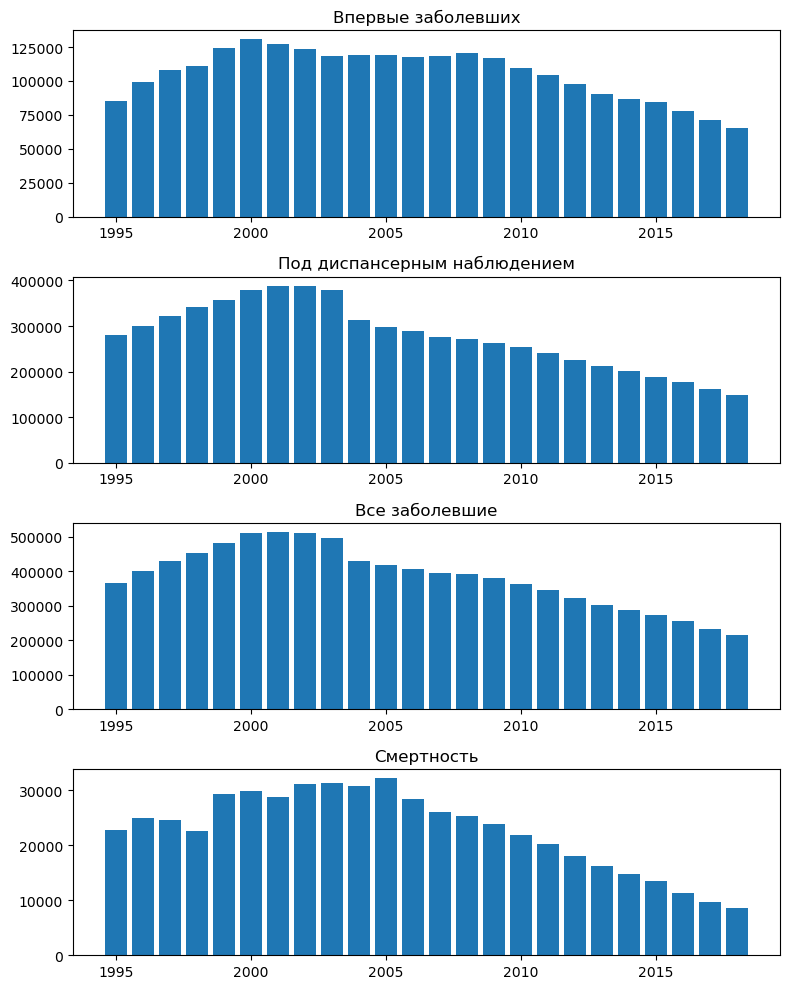

In [17]:
fig, axs = plt.subplots(4, 1, figsize=(8, 10))
axs[0].bar(df['Year'], df['ft_patient'], align='center')
axs[0].set_title('Впервые заболевших')

axs[1].bar(df['Year'], df['hosp_patient'], align='center')
axs[1].set_title('Под диспансерным наблюдением')

axs[2].bar(df['Year'], df['total_patient'], align='center')
axs[2].set_title('Все заболевшие')

axs[3].bar(df['Year'], df['mortality'], align='center')
axs[3].set_title('Смертность')

plt.tight_layout()

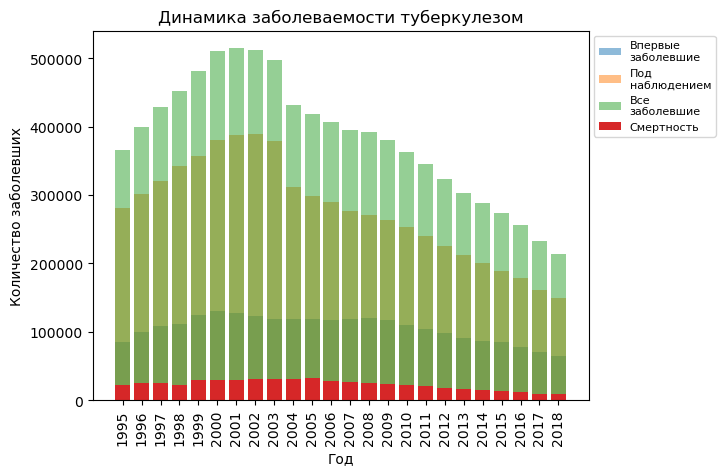

In [23]:
plt.bar(df['Year'], df['ft_patient'], align='center', alpha = 0.5, label='Впервые\nзаболевшие')
plt.bar(df['Year'], df['hosp_patient'], align='center', alpha = 0.5, label='Под\nнаблюдением')
plt.bar(df['Year'], df['total_patient'], align='center', alpha = 0.5, label='Все\nзаболевшие')
plt.bar(df['Year'], df['mortality'], align='center', alpha = 1, label='Смертность')

plt.xlabel('Год')
plt.ylabel('Количество заболевших')
plt.title('Динамика заболеваемости туберкулезом')
plt.xticks(df['Year'], rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 8})

In [24]:
df['fraction_ft_patient'] = round((df['ft_patient'] * 100 / df['total_patient']), 2)

In [25]:
df['fraction_mortality'] = round((df['mortality'] * 100 / df['total_patient']), 2)

In [26]:
mean_ft_patinet = round(df['fraction_ft_patient'].mean(), 2) #средняя доля впервые заболевших 

In [27]:
mean_mortality = round(df['fraction_mortality'].mean(), 2)   #средняя доля смертности

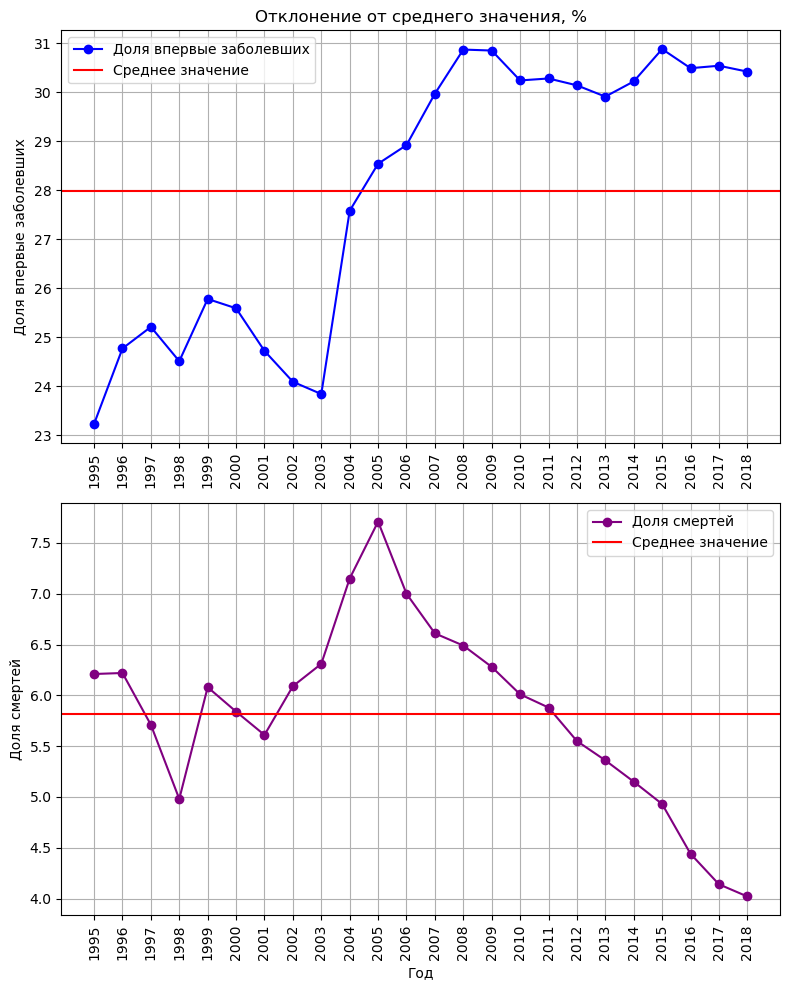

In [29]:
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# График 1: Доля впервые заболевших по годам
axs[0].plot(df['Year'], df['fraction_ft_patient'], marker='o', label='Доля впервые заболевших', color = 'blue')
axs[0].axhline(y=mean_ft_patinet, color='r', linestyle='-', label='Среднее значение')
axs[0].set_ylabel('Доля впервые заболевших')
axs[0].set_title('Отклонение от среднего значения, %')
axs[0].set_xticks(df['Year'])
axs[0].legend()
axs[0].tick_params(axis='x', rotation=90)
axs[0].grid(True)

# График 2: Доля смертей по годам
axs[1].plot(df['Year'], df['fraction_mortality'], marker='o', label='Доля смертей', color = 'purple')
axs[1].axhline(y=mean_mortality, color='r', linestyle='-', label='Среднее значение')
axs[1].set_xlabel('Год')
axs[1].set_ylabel('Доля смертей')
axs[1].set_xticks(df['Year'])
axs[1].legend()
axs[1].tick_params(axis='x', rotation=90)
axs[1].grid(True)

plt.tight_layout()